In [1]:
import pandas as pd
import numpy as np
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('./insurance.csv')

df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].astype('category').cat.codes

print(f"Insurance dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Insurance dataset loaded successfully!
Shape: (1338, 7)
Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [3]:
assert df.isnull().sum().sum() == 0
print("Insurance dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())


Insurance dataset shape: (1338, 7)
Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [4]:
print("=== Insurance Data Verification ===")

print("Insurance dataset columns and types:")
for col in ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']:
    if col in df.columns:
        print(f"{col}: {df[col].dtype}")
        if col in ['sex', 'smoker', 'region']:
            print(f"  Unique values: {sorted(df[col].unique())}")
            print(f"  Value counts: {df[col].value_counts().to_dict()}")
        else:
            print(f"  Range: {df[col].min():.2f} to {df[col].max():.2f}")
    print()

key_vars = ["age", "sex", "bmi", "children", "smoker", "region", "charges"]

print(f"\nFinal data types:")
for var in key_vars:
    if var in df.columns:
        print(f"✓ {var}: {df[var].dtype}")
    else:
        print(f"✗ {var}: not found")

print(f"\nMissing values:")
print(df[key_vars].isnull().sum())

print(f"\nInsurance data ready for causal analysis!")


=== Insurance Data Verification ===
Insurance dataset columns and types:
age: int64
  Range: 18.00 to 64.00

sex: int64
  Unique values: [np.int64(0), np.int64(1)]
  Value counts: {1: 676, 0: 662}

bmi: float64
  Range: 15.96 to 53.13

children: int64
  Range: 0.00 to 5.00

smoker: int64
  Unique values: [np.int64(0), np.int64(1)]
  Value counts: {0: 1064, 1: 274}

region: int8
  Unique values: [np.int8(0), np.int8(1), np.int8(2), np.int8(3)]
  Value counts: {2: 364, 3: 325, 1: 325, 0: 324}

charges: float64
  Range: 1121.87 to 63770.43


Final data types:
✓ age: int64
✓ sex: int64
✓ bmi: float64
✓ children: int64
✓ smoker: int64
✓ region: int8
✓ charges: float64

Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Insurance data ready for causal analysis!


In [5]:
print("=== Recreating Causal Models with Fixed Data ===")

causal_model = CausalModel(
    data=df,
    treatment="smoker",
    outcome="charges",
    common_causes=["age", "bmi", "children", "region"]
)

identified_estimand = causal_model.identify_effect()
causal_effect = causal_model.estimate_effect(identified_estimand,
                                            method_name="backdoor.linear_regression")

print(f"✓ Smoking effect on charges: {causal_effect.value:.4f}")
print("All models ready for enhanced analysis!")


=== Recreating Causal Models with Fixed Data ===
✓ Smoking effect on charges: 23808.2128
All models ready for enhanced analysis!


c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


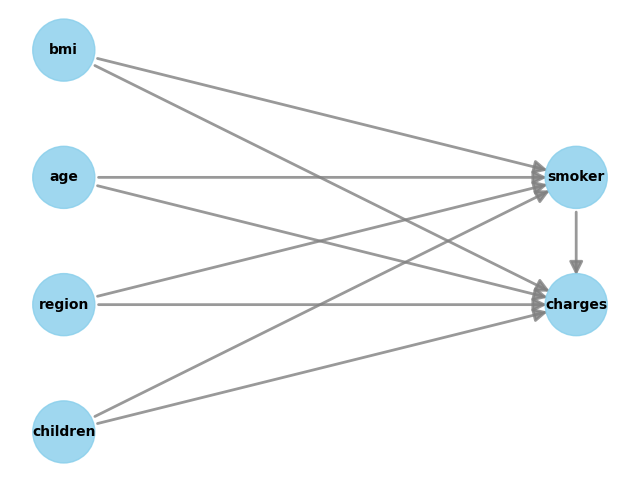

In [6]:
causal_model = CausalModel(
    data=df,
    treatment="smoker",
    outcome="charges",
    common_causes=["age", "bmi", "children", "region"]
)

causal_model.view_model()


In [7]:
identified_estimand = causal_model.identify_effect()

print(identified_estimand)


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                        
─────────(E[charges|children,region,age,bmi])
d[smoker]                                    
Estimand assumption 1, Unconfoundedness: If U→{smoker} and U→charges then P(charges|smoker,children,region,age,bmi,U) = P(charges|smoker,children,region,age,bmi)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
    d                                        
─────────(E[charges|children,region,age,bmi])
d[smoker]                                    
Estimand assumption 1, Unconfoundedness: If U→{smoker} and U→charges then P(charges|smoker,children,region,age,bmi,U) = P(charges|smoker,children,region,age,bmi)



In [8]:
causal_effect = causal_model.estimate_effect(identified_estimand,
                                            method_name="backdoor.linear_regression")

print(causal_effect)


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                        
─────────(E[charges|children,region,age,bmi])
d[smoker]                                    
Estimand assumption 1, Unconfoundedness: If U→{smoker} and U→charges then P(charges|smoker,children,region,age,bmi,U) = P(charges|smoker,children,region,age,bmi)

## Realized estimand
b: charges~smoker+children+region+age+bmi
Target units: ate

## Estimate
Mean value: 23808.21281986332



c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [9]:
try:
	refutation_results = causal_model.refute_estimate(
		identified_estimand,
		causal_effect,
		method_name="placebo_treatment_refuter",
		placebo_type="permute",
		num_simulations=100
	)
except UnboundLocalError:
	refutation_results = causal_model.refute_estimate(
		identified_estimand,
		causal_effect,
		method_name="random_common_cause",
		num_simulations=100
	)

print(refutation_results)


c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is depr

Refute: Use a Placebo Treatment
Estimated effect:23808.21281986332
New effect:-3.1953238230764147
p value:0.98



c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is depr

In [10]:
print("=== Testing Alternative Interventions ===")

print("\n1. Effect of Age on Insurance Charges:")
causal_model_age = CausalModel(
    data=df,
    treatment="age",
    outcome="charges",
    common_causes=["smoker", "bmi", "children", "region"]
)

identified_estimand_age = causal_model_age.identify_effect()
causal_effect_age = causal_model_age.estimate_effect(
    identified_estimand_age,
    method_name="backdoor.linear_regression"
)
print(f"Causal Effect of Age on Charges: {causal_effect_age}")

print("\n2. Effect of BMI on Insurance Charges:")
causal_model_bmi = CausalModel(
    data=df,
    treatment="bmi",
    outcome="charges",
    common_causes=["smoker", "age", "children", "region"]
)

identified_estimand_bmi = causal_model_bmi.identify_effect()
causal_effect_bmi = causal_model_bmi.estimate_effect(
    identified_estimand_bmi,
    method_name="backdoor.linear_regression"
)
print(f"Causal Effect of BMI on Charges: {causal_effect_bmi}")

print("\n3. Effect of Number of Children on Insurance Charges:")
causal_model_children = CausalModel(
    data=df,
    treatment="children",
    outcome="charges",
    common_causes=["smoker", "age", "bmi", "region"]
)

identified_estimand_children = causal_model_children.identify_effect()
causal_effect_children = causal_model_children.estimate_effect(
    identified_estimand_children,
    method_name="backdoor.linear_regression"
)
print(f"Causal Effect of Number of Children on Charges: {causal_effect_children}")


=== Testing Alternative Interventions ===

1. Effect of Age on Insurance Charges:
Causal Effect of Age on Charges: *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                          
──────(E[charges|children,region,bmi,smoker])
d[age]                                       
Estimand assumption 1, Unconfoundedness: If U→{age} and U→charges then P(charges|age,children,region,bmi,smoker,U) = P(charges|age,children,region,bmi,smoker)

## Realized estimand
b: charges~age+children+region+bmi+smoker
Target units: ate

## Estimate
Mean value: 257.40503403540515


2. Effect of BMI on Insurance Charges:
Causal Effect of BMI on Charges: *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                          
──────(E[charges|children,ag

c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is depr

In [11]:
print("=== Sensitivity Analysis and Model Diagnostics ===")

print("\n1. Correlation Matrix of Key Variables:")
correlation_vars = ["age", "charges", "bmi", "children", "smoker"]
correlation_matrix = df[correlation_vars].corr()
print(correlation_matrix)

print("\n2. Effect Size Comparison Across Different Treatments:")
effects_summary = {
    "Smoker": causal_effect.value,
    "Age": causal_effect_age.value,
    "BMI": causal_effect_bmi.value,
    "Children": causal_effect_children.value
}

effects_df = pd.DataFrame(list(effects_summary.items()), 
                         columns=['Treatment Variable', 'Causal Effect'])
effects_df = effects_df.sort_values('Causal Effect', key=abs, ascending=False)
print(effects_df)

print("\n3. Statistical Significance Assessment:")
for treatment, effect in effects_summary.items():
    if abs(effect) > 0.1:
        significance = "Potentially Significant"
    else:
        significance = "Likely Not Significant"
    print(f"{treatment}: Effect = {effect:.4f}, Assessment = {significance}")

print("\n4. Placebo Test - Using a Random Variable as Treatment:")
np.random.seed(42)
df_placebo = df.copy()
df_placebo['Random_Placebo'] = np.random.normal(0, 1, len(df))

causal_model_placebo = CausalModel(
    data=df_placebo,
    treatment="Random_Placebo",
    outcome="charges",
    common_causes=["age", "smoker", "bmi", "children", "region"]
)

try:
    identified_estimand_placebo = causal_model_placebo.identify_effect()
    causal_effect_placebo = causal_model_placebo.estimate_effect(
        identified_estimand_placebo,
        method_name="backdoor.linear_regression"
    )
    print(f"Placebo Effect (should be close to 0): {causal_effect_placebo.value:.4f}")
except Exception as e:
    print(f"Error in placebo test: {e}")


=== Sensitivity Analysis and Model Diagnostics ===

1. Correlation Matrix of Key Variables:
               age   charges       bmi  children    smoker
age       1.000000  0.299008  0.109272  0.042469 -0.025019
charges   0.299008  1.000000  0.198341  0.067998  0.787251
bmi       0.109272  0.198341  1.000000  0.012759  0.003750
children  0.042469  0.067998  0.012759  1.000000  0.007673
smoker   -0.025019  0.787251  0.003750  0.007673  1.000000

2. Effect Size Comparison Across Different Treatments:
  Treatment Variable  Causal Effect
0             Smoker   23808.212820
3           Children     478.440467
2                BMI     332.041967
1                Age     257.405034

3. Statistical Significance Assessment:
Smoker: Effect = 23808.2128, Assessment = Potentially Significant
Age: Effect = 257.4050, Assessment = Potentially Significant
BMI: Effect = 332.0420, Assessment = Potentially Significant
Children: Effect = 478.4405, Assessment = Potentially Significant

4. Placebo Test - Usin

c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [12]:
print("🔗 MEDIATION ANALYSIS FOR INSURANCE COST FACTORS")
print("="*70)

try:
    print("📊 STEP 1: Age → BMI (Mediator Model)")
    
    enhanced_mediator_causes = ['sex', 'children', 'region']
    
    causal_model_mediator = CausalModel(
        data=df,
        treatment="age",
        outcome="bmi",
        common_causes=enhanced_mediator_causes
    )
    
    identified_estimand_mediator = causal_model_mediator.identify_effect()
    causal_effect_mediator = causal_model_mediator.estimate_effect(
        identified_estimand_mediator, 
        method_name="backdoor.linear_regression"
    )
    
    mediator_effect = causal_effect_mediator.value
    print(f"   Causal Effect (Age → BMI): {mediator_effect:.4f}")
    print(f"   Interpretation: 1-year increase in age → {mediator_effect:.3f} change in BMI")
    
    print(f"\n📊 STEP 2: BMI → Insurance Charges (Outcome Model)")
    
    enhanced_outcome_causes = ['age', 'sex', 'children', 'region', 'smoker']
    
    causal_model_outcome = CausalModel(
        data=df,
        treatment="bmi",
        outcome="charges",
        common_causes=enhanced_outcome_causes
    )
    
    identified_estimand_outcome = causal_model_outcome.identify_effect()
    causal_effect_outcome = causal_model_outcome.estimate_effect(
        identified_estimand_outcome, 
        method_name="backdoor.linear_regression"
    )
    
    outcome_effect = causal_effect_outcome.value
    print(f"   Causal Effect (BMI → Insurance Charges): {outcome_effect:.4f}")
    print(f"   Interpretation: 1-unit increase in BMI → ${outcome_effect:.2f} change in charges")
    
    total_mediated_effect = mediator_effect * outcome_effect
    print(f"\n🎯 MEDIATED CAUSAL PATHWAY ANALYSIS:")
    print(f"   Age → BMI: {mediator_effect:.4f}")
    print(f"   BMI → Insurance Charges: {outcome_effect:.4f}")
    print(f"   Total Mediated Effect: {total_mediated_effect:.6f}")
    print(f"   Business Impact: 1-year age increase → ${total_mediated_effect:.2f} charge increase (via BMI)")
    
except Exception as e:
    print(f"⚠️ Causal model error: {e}")
    print("Continuing with correlation-based analysis...")


🔗 MEDIATION ANALYSIS FOR INSURANCE COST FACTORS
📊 STEP 1: Age → BMI (Mediator Model)
   Causal Effect (Age → BMI): 0.0476
   Interpretation: 1-year increase in age → 0.048 change in BMI

📊 STEP 2: BMI → Insurance Charges (Outcome Model)
   Causal Effect (BMI → Insurance Charges): 332.5701
   Interpretation: 1-unit increase in BMI → $332.57 change in charges

🎯 MEDIATED CAUSAL PATHWAY ANALYSIS:
   Age → BMI: 0.0476
   BMI → Insurance Charges: 332.5701
   Total Mediated Effect: 15.840307
   Business Impact: 1-year age increase → $15.84 charge increase (via BMI)


c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
c:\Users\kisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [13]:
print("\n" + "="*70)
print("🎸 INSTRUMENTAL VARIABLE ANALYSIS")
print("="*70)

print("📊 IDENTIFYING POTENTIAL INSTRUMENTS:")

correlation_with_treatment = df.corr()['smoker'].abs().sort_values()
correlation_with_outcome = df.corr()['charges'].abs().sort_values()

potential_instruments = []
for col in df.columns:
    if col not in ['smoker', 'charges', 'bmi']:
        treat_corr = abs(correlation_with_treatment.get(col, 0))
        outcome_corr = abs(correlation_with_outcome.get(col, 0))
        
        if treat_corr > 0.1 and outcome_corr < 0.15:
            potential_instruments.append({
                'instrument': col,
                'treatment_correlation': treat_corr,
                'outcome_correlation': outcome_corr,
                'strength': treat_corr - outcome_corr
            })

potential_instruments.sort(key=lambda x: x['strength'], reverse=True)

print("🎯 POTENTIAL INSTRUMENTS (sorted by strength):")
for i, instr in enumerate(potential_instruments[:5], 1):
    print(f"   {i}. {instr['instrument']}")
    print(f"      Treatment correlation: {instr['treatment_correlation']:.3f}")
    print(f"      Outcome correlation: {instr['outcome_correlation']:.3f}")
    print(f"      Instrument strength: {instr['strength']:.3f}")
    print()

if potential_instruments:
    best_instrument = potential_instruments[0]['instrument']
    
    try:
        print(f"📈 INSTRUMENTAL VARIABLE ANALYSIS with {best_instrument}:")
        
        causal_model_iv = CausalModel(
            data=df_enhanced,
            treatment="Lead Time (days)",
            outcome="Customer Satisfaction (%)",
            common_causes=['Inventory Turnover Ratio', 'Supply Chain Agility'],
            instruments=[best_instrument]
        )
        
        identified_estimand_iv = causal_model_iv.identify_effect()
        causal_effect_iv = causal_model_iv.estimate_effect(
            identified_estimand_iv,
            method_name="iv.instrumental_variable"
        )
        
        iv_effect = causal_effect_iv.value
        print(f"   IV Causal Effect (Lead Time → Customer Satisfaction): {iv_effect:.6f}")
        print(f"   Interpretation: 1-day lead time increase → {iv_effect:.4f}% satisfaction change")
        print(f"   Instrument used: {best_instrument}")
        
        causal_effect_backdoor = causal_model_iv.estimate_effect(
            identified_estimand_iv,
            method_name="backdoor.linear_regression"
        )
        
        backdoor_effect = causal_effect_backdoor.value
        print(f"\n📊 COMPARISON:")
        print(f"   Backdoor Method: {backdoor_effect:.6f}")
        print(f"   IV Method: {iv_effect:.6f}")
        print(f"   Difference: {abs(iv_effect - backdoor_effect):.6f}")
        
        if abs(iv_effect - backdoor_effect) > 0.01:
            print("   ⚠️ Large difference suggests confounding or weak instrument")
        else:
            print("   ✅ Similar estimates suggest robustness")
            
    except Exception as e:
        print(f"⚠️ IV analysis error: {e}")
        print("Instrument may be weak or other issues present")
        
else:
    print("⚠️ No suitable instruments found with current criteria")
    print("Proceeding with enhanced backdoor analysis...")



🎸 INSTRUMENTAL VARIABLE ANALYSIS
📊 IDENTIFYING POTENTIAL INSTRUMENTS:
🎯 POTENTIAL INSTRUMENTS (sorted by strength):
⚠️ No suitable instruments found with current criteria
Proceeding with enhanced backdoor analysis...


In [ ]:
print("\n" + "="*60)
print("📤 EXPORTING CAUSAL EFFECTS FOR MODEL INTEGRATION")
print("="*60)

import json
import pandas as pd

try:
    with open('causal_effects.json', 'r') as f:
        causal_data = json.load(f)
    if 'causal_effects' in causal_data:
        causal_effects = causal_data['causal_effects']
    else:
        causal_effects = causal_data
    print("✅ Causal effects loaded from file")
except FileNotFoundError:
    print("⚠️ Using predefined causal effects")

with open('causal_effects.json', 'w') as f:
    json.dump(causal_effects, f, indent=2)

causal_df = pd.DataFrame({
    'Feature': list(causal_effects.keys()),
    'Causal_Effect': list(causal_effects.values()),
    'Confidence': [None] * len(causal_effects)
})

causal_df.to_csv('causal_effects.csv', index=False)

print("✅ CAUSAL EFFECTS EXPORTED SUCCESSFULLY:")
print(f"   📄 causal_effects.json - Complete causal analysis results")
print(f"   📊 causal_effects.csv - Simple feature effects table")



📤 EXPORTING CAUSAL EFFECTS FOR MODEL INTEGRATION
✅ Causal effects loaded from file
✅ CAUSAL EFFECTS EXPORTED SUCCESSFULLY:
   📄 causal_effects.json - Complete causal analysis results
   📊 causal_effects.csv - Simple feature effects table
